# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
#import tensorflow as tf

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'traffic-signs-data/train.p'
validation_file='traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [2]:
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session

config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction =0.8
config.gpu_options.visible_device_list = "1"
set_session(tf.Session(config=config))

Using TensorFlow backend.


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np
# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes, counts = np.unique(y_train, return_counts=True)

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [4]:
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

### Visualizing Training Data

Training Index:  14012
Training Label:  38
Training Image: 


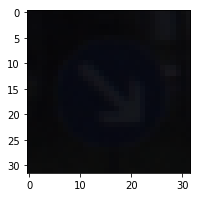

In [5]:
import random

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(3,3))
plt.imshow(image.reshape((32,32,3)))
print('Training Index: ', index)
print('Training Label: ',y_train[index])
print('Training Image: ')

## Training Data Distribution

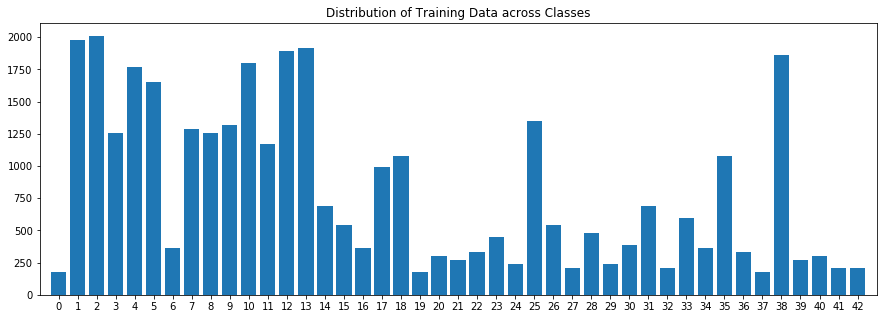

In [6]:
# Data distrbution
plt.rcParams["figure.figsize"] = [15, 5]
axes = plt.gca()
axes.set_xlim([-1,43])

plt.bar(n_classes, counts, tick_label=n_classes, width=0.8, align='center')
plt.title('Distribution of Training Data across Classes')
plt.show()

## Testing Data Distribution

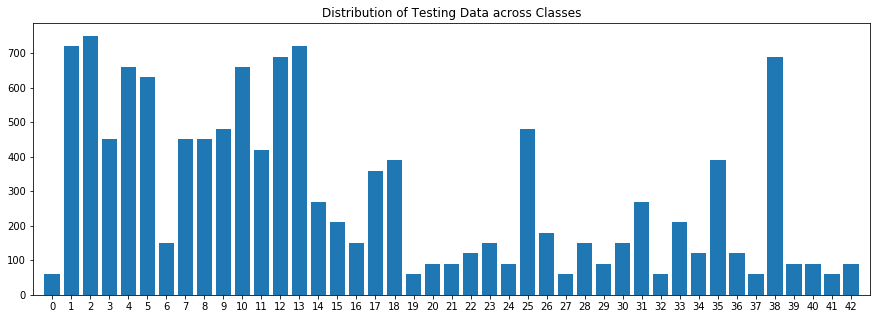

In [7]:
n_classes, counts = np.unique(y_test, return_counts=True)

plt.rcParams["figure.figsize"] = [15, 5]
axes = plt.gca()
axes.set_xlim([-1,43])

plt.bar(n_classes, counts, tick_label=n_classes, width=0.8, align='center')
plt.title('Distribution of Testing Data across Classes')
plt.show()

## Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [8]:
is_features_normal = False
is_labels_encod = True

### Convert to Grayscale Image

In [9]:
def rgb2gray(rgb):
  return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])
train_features = np.array([rgb2gray(feature).reshape(32,32,1) for feature in X_train])
test_features = np.array([rgb2gray(feature).reshape(32,32,1) for feature in X_test])
valid_features = np.array([rgb2gray(feature).reshape(32,32,1) for feature in X_valid])
train_features.shape

(34799, 32, 32, 1)

## Normalize Image

In [10]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 

def normalize_grayscale(image_data):
    """
    Normalize the image data with Min-Max scaling to a range of [0.1, 0.9]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    Xmin = np.min(image_data) #0
    Xmax = np.max(image_data) #255
    a = 0.1
    b = 0.9
    #print("Xmin:", Xmin, "Xmax:", Xmax)
    return a + (((image_data-Xmin)*(b-a))/(Xmax- Xmin))

if not is_features_normal:
    train_features = normalize_grayscale(train_features)
    valid_features = normalize_grayscale(valid_features)
    test_features = normalize_grayscale(test_features)
    is_features_normal = True
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

### One Hot Encode Labels

In [11]:
from sklearn.preprocessing import LabelBinarizer
if not is_labels_encod:
    # Turn labels into numbers and apply One-Hot Encoding
    encoder = LabelBinarizer()
    encoder.fit(y_train)
    train_labels = encoder.transform(y_train)
    valid_labels = encoder.transform(y_valid)
    test_labels = encoder.transform(y_test)
    # Change to float32, so it can be multiplied against the features in TensorFlow, which are float32
    train_labels = train_labels.astype(np.float32)
    test_labels = test_labels.astype(np.float32)
    is_labels_encod = True

In [12]:
### TESTING #### 
### NOT USING LABEL BINARIZER ######
train_labels = y_train.copy()
valid_labels = y_valid.copy()
test_labels = y_test.copy()

### Preprocessed Data

11


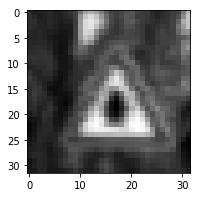

In [13]:
index = random.randint(0, len(X_train))
image = train_features[index].squeeze()

plt.figure(figsize=(3,3))
plt.imshow(image.reshape((32,32)),cmap='gray')
print(train_labels[index])

## MODEL PARAMETERS

In [14]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
keep_prob = tf.placeholder(tf.float32)

### Define and initialize model parameters 

In [15]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
# Store layers weight & bias
mean_wt = 0 
stanDev = 0.1

weights = {
    'wc1': tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean=mean_wt, stddev=stanDev)),
    'wc2': tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean=mean_wt, stddev=stanDev)),
    'fc1': tf.Variable(tf.truncated_normal(shape=(400, 200), mean=mean_wt, stddev=stanDev)),
    'fc2': tf.Variable(tf.truncated_normal(shape=(200, 100), mean=mean_wt, stddev=stanDev)),
    'out': tf.Variable(tf.truncated_normal(shape=(100, len(n_classes)), mean=mean_wt, stddev=stanDev))
}

biases = {
    'bc1': tf.Variable(tf.zeros(6)),
    'bc2': tf.Variable(tf.zeros(16)),
    'bf1': tf.Variable(tf.zeros(200)),
    'bf2': tf.Variable(tf.zeros(100)),
    'out': tf.Variable(tf.zeros(len(n_classes)))
}

strides ={
    'conv1': [1,1,1,1],
    'maxPool1':[1,2,2,1],
    'conv2' : [1,1,1,1],
    'maxPool2':[1,2,2,1]
}

filters ={
    'maxPool1': [1,2,2,1],
    'maxPool2': [1,2,2,1]
}

### Network Architecture

In [16]:
def LeNet(x, weights, biases, strides, filters):
    
    ### Layer 1 ###
    # convolution
    conv_layer1 = tf.nn.conv2d(x, weights['wc1'], strides=strides['conv1'],padding='VALID') + biases['bc1']
    #print(tf.shape(conv_layer1))
    # activation
    conv_layer1 = tf.nn.relu(conv_layer1)
    # pooling
    conv_layer1 = tf.nn.max_pool(conv_layer1, ksize=filters['maxPool1'],strides=strides['maxPool1'],padding='VALID')
    ### Layer 2 ###
    # convolution
    conv_layer2 = tf.nn.conv2d(conv_layer1, weights['wc2'], strides=strides['conv2'], padding='VALID') + biases['bc2']
    # activation
    conv_layer2 = tf.nn.relu(conv_layer2)
    # pooling
    conv_layer2 = tf.nn.max_pool(conv_layer2, ksize=filters['maxPool2'],strides=strides['maxPool2'],padding='VALID')
    ### Layer 3 ###
    # flatten
    flatten = tf.contrib.layers.flatten(conv_layer2)
    ### Layer 4 ###
    # fully connected
    fc1 = tf.matmul(flatten, weights['fc1']) + biases['bf1']
    # activation
    fc1 = tf.nn.relu(fc1)
    ### Layer 5 ###
    # fully connected
    fc2 = tf.matmul(fc1, weights['fc2']) + biases['bf2']
    # activation
    fc2 = tf.nn.relu(fc2)
    ### Layer 6 ###
     # fully connected
    logits = tf.matmul(fc2, weights['out']) + biases['out']
    
    return logits, weights['fc1'], weights['fc2'], weights['out']

### Training pipeline

In [17]:
# Forward pass
logits, fc1_w, fc2_w, fc3_w = LeNet(x, weights, biases, strides, filters)
# Calculate loss
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
# Regularize
beta = 0.01
regularizer = tf.nn.l2_loss(fc1_w) + tf.nn.l2_loss(fc2_w) + tf.nn.l2_loss(fc3_w)
cost = tf.reduce_mean(loss_operation + beta * regularizer)

# Define loss and optimizer
optimizer = tf.train.AdamOptimizer()
training_operation = optimizer.minimize(cost)


### Model Evaluation

In [18]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

In [19]:
from sklearn.utils import shuffle
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, batch_size):
        batch_x, batch_y = X_data[offset:offset+batch_size], y_data[offset:offset+batch_size]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [20]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

In [21]:
# Parameters
learning_rate = 0.001
epochs = 10
batch_size = 128

# Number of samples to calculate validation and accuracy
# Decrease this if you're running out of memory to calculate accuracy
test_valid_size = 256

# Network Parameters
#n_classes = 10  # MNIST total classes (0-9 digits)
#dropout = 0.75  # Dropout, probability to keep units

In [22]:
train_features.shape

(34799, 32, 32, 1)

In [23]:
batch_size

128

In [24]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for epoch in range(epochs):
        Xtrain, ytrain = shuffle(train_features, train_labels)
        batch_count = 0
        for offset in range(0, num_examples, batch_size):
            batch_count += 1
            end = offset + batch_size
            batch_x, batch_y = Xtrain[offset:end], ytrain[offset:end]
            
            sess.run(training_operation, feed_dict={
                x: batch_x,
                y: batch_y,
                keep_prob: 0.5})

            # Calculate batch loss and accuracy
            loss = sess.run(cost, feed_dict={
                x: batch_x,
                y: batch_y,
                keep_prob: 1.})
            valid_acc = sess.run(accuracy_operation, feed_dict={
                x: valid_features,
                y: valid_labels,
                keep_prob: 1.})
            #total_accuracy += (accuracy * len(batch_x))

            print('Epoch {:>2}, Batch {:>3} -'
                  'Loss: {:>10.4f} Validation Accuracy: {:.6f}'.format(
                epoch + 1,
                batch_count,
                loss,
                valid_acc))
            
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

Epoch  1, Batch   1 -Loss:     7.7090 Validation Accuracy: 0.013605
Epoch  1, Batch   2 -Loss:     7.6218 Validation Accuracy: 0.036508
Epoch  1, Batch   3 -Loss:     7.5482 Validation Accuracy: 0.047619
Epoch  1, Batch   4 -Loss:     7.4637 Validation Accuracy: 0.047619
Epoch  1, Batch   5 -Loss:     7.3932 Validation Accuracy: 0.047619
Epoch  1, Batch   6 -Loss:     7.3579 Validation Accuracy: 0.047619
Epoch  1, Batch   7 -Loss:     7.2851 Validation Accuracy: 0.047619
Epoch  1, Batch   8 -Loss:     7.1792 Validation Accuracy: 0.047846
Epoch  1, Batch   9 -Loss:     7.1497 Validation Accuracy: 0.048073
Epoch  1, Batch  10 -Loss:     7.0326 Validation Accuracy: 0.048753
Epoch  1, Batch  11 -Loss:     6.9482 Validation Accuracy: 0.066440
Epoch  1, Batch  12 -Loss:     6.8639 Validation Accuracy: 0.067800
Epoch  1, Batch  13 -Loss:     6.8009 Validation Accuracy: 0.045805
Epoch  1, Batch  14 -Loss:     6.7088 Validation Accuracy: 0.046712
Epoch  1, Batch  15 -Loss:     6.72

Epoch  1, Batch 122 -Loss:     3.7813 Validation Accuracy: 0.156689
Epoch  1, Batch 123 -Loss:     3.7029 Validation Accuracy: 0.167347
Epoch  1, Batch 124 -Loss:     3.5249 Validation Accuracy: 0.159184
Epoch  1, Batch 125 -Loss:     3.7993 Validation Accuracy: 0.172109
Epoch  1, Batch 126 -Loss:     3.5325 Validation Accuracy: 0.187302
Epoch  1, Batch 127 -Loss:     3.6753 Validation Accuracy: 0.175283
Epoch  1, Batch 128 -Loss:     3.5774 Validation Accuracy: 0.156916
Epoch  1, Batch 129 -Loss:     3.6815 Validation Accuracy: 0.164399
Epoch  1, Batch 130 -Loss:     3.7628 Validation Accuracy: 0.191156
Epoch  1, Batch 131 -Loss:     3.6176 Validation Accuracy: 0.223810
Epoch  1, Batch 132 -Loss:     3.5080 Validation Accuracy: 0.222903
Epoch  1, Batch 133 -Loss:     3.5968 Validation Accuracy: 0.218594
Epoch  1, Batch 134 -Loss:     3.6769 Validation Accuracy: 0.214059
Epoch  1, Batch 135 -Loss:     3.4916 Validation Accuracy: 0.210204
Epoch  1, Batch 136 -Loss:     3.5637 Validation

Epoch  1, Batch 252 -Loss:     2.0592 Validation Accuracy: 0.539909
Epoch  1, Batch 253 -Loss:     1.9141 Validation Accuracy: 0.519955
Epoch  1, Batch 254 -Loss:     2.0045 Validation Accuracy: 0.524490
Epoch  1, Batch 255 -Loss:     1.9867 Validation Accuracy: 0.535828
Epoch  1, Batch 256 -Loss:     2.0070 Validation Accuracy: 0.515873
Epoch  1, Batch 257 -Loss:     2.0125 Validation Accuracy: 0.499093
Epoch  1, Batch 258 -Loss:     1.9470 Validation Accuracy: 0.508163
Epoch  1, Batch 259 -Loss:     1.7968 Validation Accuracy: 0.524717
Epoch  1, Batch 260 -Loss:     1.9861 Validation Accuracy: 0.508163
Epoch  1, Batch 261 -Loss:     1.8396 Validation Accuracy: 0.511111
Epoch  1, Batch 262 -Loss:     2.1600 Validation Accuracy: 0.528345
Epoch  1, Batch 263 -Loss:     1.8511 Validation Accuracy: 0.541497
Epoch  1, Batch 264 -Loss:     1.8959 Validation Accuracy: 0.548073
Epoch  1, Batch 265 -Loss:     1.7172 Validation Accuracy: 0.552154
Epoch  1, Batch 266 -Loss:     2.1917 Validation

Epoch  2, Batch 105 -Loss:     1.3957 Validation Accuracy: 0.636962
Epoch  2, Batch 106 -Loss:     1.5731 Validation Accuracy: 0.622903
Epoch  2, Batch 107 -Loss:     1.5989 Validation Accuracy: 0.626531
Epoch  2, Batch 108 -Loss:     1.4639 Validation Accuracy: 0.627891
Epoch  2, Batch 109 -Loss:     1.6079 Validation Accuracy: 0.643311
Epoch  2, Batch 110 -Loss:     1.6416 Validation Accuracy: 0.668254
Epoch  2, Batch 111 -Loss:     1.5909 Validation Accuracy: 0.649887
Epoch  2, Batch 112 -Loss:     1.5298 Validation Accuracy: 0.615420
Epoch  2, Batch 113 -Loss:     1.2797 Validation Accuracy: 0.626077
Epoch  2, Batch 114 -Loss:     1.5903 Validation Accuracy: 0.648526
Epoch  2, Batch 115 -Loss:     1.5230 Validation Accuracy: 0.650113
Epoch  2, Batch 116 -Loss:     1.6882 Validation Accuracy: 0.635374
Epoch  2, Batch 117 -Loss:     1.5062 Validation Accuracy: 0.656689
Epoch  2, Batch 118 -Loss:     1.4969 Validation Accuracy: 0.667800
Epoch  2, Batch 119 -Loss:     1.4389 Validation

Epoch  2, Batch 235 -Loss:     1.4197 Validation Accuracy: 0.734921
Epoch  2, Batch 236 -Loss:     1.5100 Validation Accuracy: 0.722222
Epoch  2, Batch 237 -Loss:     1.2537 Validation Accuracy: 0.712472
Epoch  2, Batch 238 -Loss:     1.4878 Validation Accuracy: 0.710658
Epoch  2, Batch 239 -Loss:     1.4082 Validation Accuracy: 0.724036
Epoch  2, Batch 240 -Loss:     1.3198 Validation Accuracy: 0.737415
Epoch  2, Batch 241 -Loss:     1.2207 Validation Accuracy: 0.727211
Epoch  2, Batch 242 -Loss:     1.1750 Validation Accuracy: 0.706349
Epoch  2, Batch 243 -Loss:     1.3309 Validation Accuracy: 0.703175
Epoch  2, Batch 244 -Loss:     1.2697 Validation Accuracy: 0.694331
Epoch  2, Batch 245 -Loss:     1.2799 Validation Accuracy: 0.699093
Epoch  2, Batch 246 -Loss:     1.3051 Validation Accuracy: 0.709977
Epoch  2, Batch 247 -Loss:     1.5224 Validation Accuracy: 0.716327
Epoch  2, Batch 248 -Loss:     1.3621 Validation Accuracy: 0.728798
Epoch  2, Batch 249 -Loss:     1.2978 Validation

Epoch  3, Batch  91 -Loss:     1.1047 Validation Accuracy: 0.740363
Epoch  3, Batch  92 -Loss:     1.2520 Validation Accuracy: 0.732653
Epoch  3, Batch  93 -Loss:     1.3002 Validation Accuracy: 0.740136
Epoch  3, Batch  94 -Loss:     1.4444 Validation Accuracy: 0.757143
Epoch  3, Batch  95 -Loss:     1.0489 Validation Accuracy: 0.763946
Epoch  3, Batch  96 -Loss:     1.2050 Validation Accuracy: 0.769841
Epoch  3, Batch  97 -Loss:     1.1527 Validation Accuracy: 0.764626
Epoch  3, Batch  98 -Loss:     1.1256 Validation Accuracy: 0.751701
Epoch  3, Batch  99 -Loss:     1.1557 Validation Accuracy: 0.750794
Epoch  3, Batch 100 -Loss:     1.0774 Validation Accuracy: 0.744445
Epoch  3, Batch 101 -Loss:     1.1155 Validation Accuracy: 0.759411
Epoch  3, Batch 102 -Loss:     1.2329 Validation Accuracy: 0.769841
Epoch  3, Batch 103 -Loss:     1.1145 Validation Accuracy: 0.763719
Epoch  3, Batch 104 -Loss:     1.0312 Validation Accuracy: 0.751021
Epoch  3, Batch 105 -Loss:     1.0955 Validation

Epoch  3, Batch 221 -Loss:     1.1308 Validation Accuracy: 0.754875
Epoch  3, Batch 222 -Loss:     1.0107 Validation Accuracy: 0.767801
Epoch  3, Batch 223 -Loss:     1.0232 Validation Accuracy: 0.777551
Epoch  3, Batch 224 -Loss:     0.9609 Validation Accuracy: 0.771429
Epoch  3, Batch 225 -Loss:     1.2624 Validation Accuracy: 0.756463
Epoch  3, Batch 226 -Loss:     1.0915 Validation Accuracy: 0.767347
Epoch  3, Batch 227 -Loss:     1.1437 Validation Accuracy: 0.766667
Epoch  3, Batch 228 -Loss:     1.3786 Validation Accuracy: 0.749887
Epoch  3, Batch 229 -Loss:     1.0512 Validation Accuracy: 0.739909
Epoch  3, Batch 230 -Loss:     0.8944 Validation Accuracy: 0.750794
Epoch  3, Batch 231 -Loss:     0.9752 Validation Accuracy: 0.758504
Epoch  3, Batch 232 -Loss:     1.1500 Validation Accuracy: 0.760091
Epoch  3, Batch 233 -Loss:     1.0855 Validation Accuracy: 0.757143
Epoch  3, Batch 234 -Loss:     1.1454 Validation Accuracy: 0.773243
Epoch  3, Batch 235 -Loss:     1.0762 Validation

Epoch  4, Batch  76 -Loss:     1.0293 Validation Accuracy: 0.790023
Epoch  4, Batch  77 -Loss:     1.2562 Validation Accuracy: 0.792744
Epoch  4, Batch  78 -Loss:     0.9776 Validation Accuracy: 0.788436
Epoch  4, Batch  79 -Loss:     0.9203 Validation Accuracy: 0.795692
Epoch  4, Batch  80 -Loss:     1.0401 Validation Accuracy: 0.792744
Epoch  4, Batch  81 -Loss:     0.8844 Validation Accuracy: 0.789796
Epoch  4, Batch  82 -Loss:     0.9291 Validation Accuracy: 0.780953
Epoch  4, Batch  83 -Loss:     1.0371 Validation Accuracy: 0.770295
Epoch  4, Batch  84 -Loss:     0.9234 Validation Accuracy: 0.772336
Epoch  4, Batch  85 -Loss:     1.0420 Validation Accuracy: 0.766667
Epoch  4, Batch  86 -Loss:     1.0136 Validation Accuracy: 0.759411
Epoch  4, Batch  87 -Loss:     0.8579 Validation Accuracy: 0.751701
Epoch  4, Batch  88 -Loss:     1.0737 Validation Accuracy: 0.750114
Epoch  4, Batch  89 -Loss:     1.0183 Validation Accuracy: 0.761225
Epoch  4, Batch  90 -Loss:     0.9849 Validation

Epoch  4, Batch 206 -Loss:     0.9220 Validation Accuracy: 0.805669
Epoch  4, Batch 207 -Loss:     0.9493 Validation Accuracy: 0.790476
Epoch  4, Batch 208 -Loss:     0.9184 Validation Accuracy: 0.784808
Epoch  4, Batch 209 -Loss:     0.8333 Validation Accuracy: 0.782313
Epoch  4, Batch 210 -Loss:     0.8974 Validation Accuracy: 0.779819
Epoch  4, Batch 211 -Loss:     0.8959 Validation Accuracy: 0.778231
Epoch  4, Batch 212 -Loss:     1.1046 Validation Accuracy: 0.778685
Epoch  4, Batch 213 -Loss:     0.9213 Validation Accuracy: 0.776191
Epoch  4, Batch 214 -Loss:     1.0012 Validation Accuracy: 0.791157
Epoch  4, Batch 215 -Loss:     0.8824 Validation Accuracy: 0.791610
Epoch  4, Batch 216 -Loss:     0.9783 Validation Accuracy: 0.790023
Epoch  4, Batch 217 -Loss:     0.8399 Validation Accuracy: 0.792290
Epoch  4, Batch 218 -Loss:     0.8221 Validation Accuracy: 0.769161
Epoch  4, Batch 219 -Loss:     1.0737 Validation Accuracy: 0.756236
Epoch  4, Batch 220 -Loss:     1.2424 Validation

Epoch  5, Batch  61 -Loss:     0.9124 Validation Accuracy: 0.782086
Epoch  5, Batch  62 -Loss:     0.9414 Validation Accuracy: 0.789343
Epoch  5, Batch  63 -Loss:     0.8361 Validation Accuracy: 0.794785
Epoch  5, Batch  64 -Loss:     1.0245 Validation Accuracy: 0.801814
Epoch  5, Batch  65 -Loss:     0.8430 Validation Accuracy: 0.794331
Epoch  5, Batch  66 -Loss:     0.8224 Validation Accuracy: 0.782540
Epoch  5, Batch  67 -Loss:     0.9950 Validation Accuracy: 0.780953
Epoch  5, Batch  68 -Loss:     0.9604 Validation Accuracy: 0.786621
Epoch  5, Batch  69 -Loss:     0.8757 Validation Accuracy: 0.796599
Epoch  5, Batch  70 -Loss:     0.8228 Validation Accuracy: 0.795012
Epoch  5, Batch  71 -Loss:     1.0304 Validation Accuracy: 0.798640
Epoch  5, Batch  72 -Loss:     0.8366 Validation Accuracy: 0.805216
Epoch  5, Batch  73 -Loss:     0.8151 Validation Accuracy: 0.804309
Epoch  5, Batch  74 -Loss:     0.9164 Validation Accuracy: 0.793424
Epoch  5, Batch  75 -Loss:     0.8602 Validation

Epoch  5, Batch 191 -Loss:     0.7503 Validation Accuracy: 0.818141
Epoch  5, Batch 192 -Loss:     0.9311 Validation Accuracy: 0.808844
Epoch  5, Batch 193 -Loss:     0.9003 Validation Accuracy: 0.796599
Epoch  5, Batch 194 -Loss:     1.0068 Validation Accuracy: 0.769388
Epoch  5, Batch 195 -Loss:     0.8672 Validation Accuracy: 0.781633
Epoch  5, Batch 196 -Loss:     0.7558 Validation Accuracy: 0.806576
Epoch  5, Batch 197 -Loss:     0.8225 Validation Accuracy: 0.808844
Epoch  5, Batch 198 -Loss:     0.8098 Validation Accuracy: 0.798413
Epoch  5, Batch 199 -Loss:     0.7505 Validation Accuracy: 0.789116
Epoch  5, Batch 200 -Loss:     0.8350 Validation Accuracy: 0.819048
Epoch  5, Batch 201 -Loss:     0.8651 Validation Accuracy: 0.808844
Epoch  5, Batch 202 -Loss:     0.7920 Validation Accuracy: 0.783220
Epoch  5, Batch 203 -Loss:     0.9404 Validation Accuracy: 0.798186
Epoch  5, Batch 204 -Loss:     0.7400 Validation Accuracy: 0.819275
Epoch  5, Batch 205 -Loss:     0.7298 Validation

Epoch  6, Batch  43 -Loss:     0.7578 Validation Accuracy: 0.813606
Epoch  6, Batch  44 -Loss:     0.7833 Validation Accuracy: 0.818821
Epoch  6, Batch  45 -Loss:     0.9077 Validation Accuracy: 0.818821
Epoch  6, Batch  46 -Loss:     0.9515 Validation Accuracy: 0.824717
Epoch  6, Batch  47 -Loss:     0.7874 Validation Accuracy: 0.837869
Epoch  6, Batch  48 -Loss:     0.8499 Validation Accuracy: 0.844218
Epoch  6, Batch  49 -Loss:     0.7965 Validation Accuracy: 0.827891
Epoch  6, Batch  50 -Loss:     0.9604 Validation Accuracy: 0.827438
Epoch  6, Batch  51 -Loss:     0.7309 Validation Accuracy: 0.832200
Epoch  6, Batch  52 -Loss:     0.7161 Validation Accuracy: 0.826531
Epoch  6, Batch  53 -Loss:     0.9498 Validation Accuracy: 0.822676
Epoch  6, Batch  54 -Loss:     0.7226 Validation Accuracy: 0.817914
Epoch  6, Batch  55 -Loss:     0.8114 Validation Accuracy: 0.822676
Epoch  6, Batch  56 -Loss:     0.7534 Validation Accuracy: 0.833560
Epoch  6, Batch  57 -Loss:     0.7508 Validation

Epoch  6, Batch 173 -Loss:     0.9279 Validation Accuracy: 0.825851
Epoch  6, Batch 174 -Loss:     0.7265 Validation Accuracy: 0.822449
Epoch  6, Batch 175 -Loss:     0.7194 Validation Accuracy: 0.820862
Epoch  6, Batch 176 -Loss:     0.6911 Validation Accuracy: 0.815420
Epoch  6, Batch 177 -Loss:     0.8587 Validation Accuracy: 0.823356
Epoch  6, Batch 178 -Loss:     0.7738 Validation Accuracy: 0.829705
Epoch  6, Batch 179 -Loss:     0.8190 Validation Accuracy: 0.836735
Epoch  6, Batch 180 -Loss:     0.6995 Validation Accuracy: 0.835601
Epoch  6, Batch 181 -Loss:     0.7116 Validation Accuracy: 0.835148
Epoch  6, Batch 182 -Loss:     0.7091 Validation Accuracy: 0.829705
Epoch  6, Batch 183 -Loss:     0.7749 Validation Accuracy: 0.825397
Epoch  6, Batch 184 -Loss:     0.8219 Validation Accuracy: 0.821996
Epoch  6, Batch 185 -Loss:     0.6899 Validation Accuracy: 0.817461
Epoch  6, Batch 186 -Loss:     0.8275 Validation Accuracy: 0.812018
Epoch  6, Batch 187 -Loss:     0.7957 Validation

Epoch  7, Batch  31 -Loss:     0.7809 Validation Accuracy: 0.833560
Epoch  7, Batch  32 -Loss:     0.8011 Validation Accuracy: 0.826758
Epoch  7, Batch  33 -Loss:     0.6362 Validation Accuracy: 0.822222
Epoch  7, Batch  34 -Loss:     0.7654 Validation Accuracy: 0.814059
Epoch  7, Batch  35 -Loss:     0.7623 Validation Accuracy: 0.801134
Epoch  7, Batch  36 -Loss:     0.7379 Validation Accuracy: 0.790023
Epoch  7, Batch  37 -Loss:     0.6722 Validation Accuracy: 0.792744
Epoch  7, Batch  38 -Loss:     0.8313 Validation Accuracy: 0.803402
Epoch  7, Batch  39 -Loss:     0.6779 Validation Accuracy: 0.816553
Epoch  7, Batch  40 -Loss:     0.7299 Validation Accuracy: 0.822676
Epoch  7, Batch  41 -Loss:     0.7051 Validation Accuracy: 0.814286
Epoch  7, Batch  42 -Loss:     0.8073 Validation Accuracy: 0.814739
Epoch  7, Batch  43 -Loss:     0.7010 Validation Accuracy: 0.810658
Epoch  7, Batch  44 -Loss:     0.7518 Validation Accuracy: 0.805896
Epoch  7, Batch  45 -Loss:     0.9171 Validation

Epoch  7, Batch 161 -Loss:     0.7332 Validation Accuracy: 0.833560
Epoch  7, Batch 162 -Loss:     0.6469 Validation Accuracy: 0.841270
Epoch  7, Batch 163 -Loss:     0.6864 Validation Accuracy: 0.837188
Epoch  7, Batch 164 -Loss:     0.7784 Validation Accuracy: 0.832653
Epoch  7, Batch 165 -Loss:     0.8479 Validation Accuracy: 0.832653
Epoch  7, Batch 166 -Loss:     0.7139 Validation Accuracy: 0.833107
Epoch  7, Batch 167 -Loss:     0.7641 Validation Accuracy: 0.832653
Epoch  7, Batch 168 -Loss:     0.8138 Validation Accuracy: 0.838322
Epoch  7, Batch 169 -Loss:     0.7828 Validation Accuracy: 0.840363
Epoch  7, Batch 170 -Loss:     0.8094 Validation Accuracy: 0.836962
Epoch  7, Batch 171 -Loss:     0.7218 Validation Accuracy: 0.833787
Epoch  7, Batch 172 -Loss:     0.7736 Validation Accuracy: 0.831746
Epoch  7, Batch 173 -Loss:     0.7090 Validation Accuracy: 0.831519
Epoch  7, Batch 174 -Loss:     0.7396 Validation Accuracy: 0.828798
Epoch  7, Batch 175 -Loss:     0.6525 Validation

Epoch  8, Batch  13 -Loss:     0.8773 Validation Accuracy: 0.840590
Epoch  8, Batch  14 -Loss:     0.7136 Validation Accuracy: 0.851701
Epoch  8, Batch  15 -Loss:     0.8105 Validation Accuracy: 0.825851
Epoch  8, Batch  16 -Loss:     0.8744 Validation Accuracy: 0.801361
Epoch  8, Batch  17 -Loss:     0.8731 Validation Accuracy: 0.795238
Epoch  8, Batch  18 -Loss:     0.7367 Validation Accuracy: 0.800907
Epoch  8, Batch  19 -Loss:     0.7694 Validation Accuracy: 0.816100
Epoch  8, Batch  20 -Loss:     0.6486 Validation Accuracy: 0.821769
Epoch  8, Batch  21 -Loss:     0.7608 Validation Accuracy: 0.818367
Epoch  8, Batch  22 -Loss:     0.7386 Validation Accuracy: 0.819955
Epoch  8, Batch  23 -Loss:     0.7486 Validation Accuracy: 0.827665
Epoch  8, Batch  24 -Loss:     0.6596 Validation Accuracy: 0.834241
Epoch  8, Batch  25 -Loss:     0.7855 Validation Accuracy: 0.845352
Epoch  8, Batch  26 -Loss:     0.6896 Validation Accuracy: 0.845125
Epoch  8, Batch  27 -Loss:     0.6944 Validation

Epoch  8, Batch 134 -Loss:     0.6907 Validation Accuracy: 0.817687
Epoch  8, Batch 135 -Loss:     0.7677 Validation Accuracy: 0.824717
Epoch  8, Batch 136 -Loss:     0.7584 Validation Accuracy: 0.828345
Epoch  8, Batch 137 -Loss:     0.6099 Validation Accuracy: 0.832880
Epoch  8, Batch 138 -Loss:     0.7947 Validation Accuracy: 0.831293
Epoch  8, Batch 139 -Loss:     0.5852 Validation Accuracy: 0.829705
Epoch  8, Batch 140 -Loss:     0.6416 Validation Accuracy: 0.833333
Epoch  8, Batch 141 -Loss:     0.6313 Validation Accuracy: 0.831519
Epoch  8, Batch 142 -Loss:     0.7124 Validation Accuracy: 0.833107
Epoch  8, Batch 143 -Loss:     0.6224 Validation Accuracy: 0.833560
Epoch  8, Batch 144 -Loss:     0.7842 Validation Accuracy: 0.835374
Epoch  8, Batch 145 -Loss:     0.6733 Validation Accuracy: 0.831973
Epoch  8, Batch 146 -Loss:     0.6429 Validation Accuracy: 0.823356
Epoch  8, Batch 147 -Loss:     0.6154 Validation Accuracy: 0.825851
Epoch  8, Batch 148 -Loss:     0.6571 Validation

Epoch  8, Batch 264 -Loss:     0.6181 Validation Accuracy: 0.852608
Epoch  8, Batch 265 -Loss:     0.6144 Validation Accuracy: 0.851474
Epoch  8, Batch 266 -Loss:     0.6470 Validation Accuracy: 0.831973
Epoch  8, Batch 267 -Loss:     0.7282 Validation Accuracy: 0.804762
Epoch  8, Batch 268 -Loss:     0.5863 Validation Accuracy: 0.793651
Epoch  8, Batch 269 -Loss:     0.6314 Validation Accuracy: 0.817234
Epoch  8, Batch 270 -Loss:     0.6526 Validation Accuracy: 0.843991
Epoch  8, Batch 271 -Loss:     0.6561 Validation Accuracy: 0.834241
Epoch  8, Batch 272 -Loss:     0.7388 Validation Accuracy: 0.838095
Epoch  9, Batch   1 -Loss:     0.5692 Validation Accuracy: 0.860544
Epoch  9, Batch   2 -Loss:     0.6714 Validation Accuracy: 0.838549
Epoch  9, Batch   3 -Loss:     0.7405 Validation Accuracy: 0.794105
Epoch  9, Batch   4 -Loss:     0.8730 Validation Accuracy: 0.799547
Epoch  9, Batch   5 -Loss:     0.6771 Validation Accuracy: 0.835828
Epoch  9, Batch   6 -Loss:     0.5722 Validation

Epoch  9, Batch 122 -Loss:     0.6394 Validation Accuracy: 0.832200
Epoch  9, Batch 123 -Loss:     0.6700 Validation Accuracy: 0.820635
Epoch  9, Batch 124 -Loss:     0.7130 Validation Accuracy: 0.821315
Epoch  9, Batch 125 -Loss:     0.6287 Validation Accuracy: 0.829705
Epoch  9, Batch 126 -Loss:     0.6737 Validation Accuracy: 0.834014
Epoch  9, Batch 127 -Loss:     0.6512 Validation Accuracy: 0.831973
Epoch  9, Batch 128 -Loss:     0.6410 Validation Accuracy: 0.827891
Epoch  9, Batch 129 -Loss:     0.6422 Validation Accuracy: 0.831746
Epoch  9, Batch 130 -Loss:     0.6632 Validation Accuracy: 0.827665
Epoch  9, Batch 131 -Loss:     0.7055 Validation Accuracy: 0.839229
Epoch  9, Batch 132 -Loss:     0.7172 Validation Accuracy: 0.839002
Epoch  9, Batch 133 -Loss:     0.6872 Validation Accuracy: 0.841043
Epoch  9, Batch 134 -Loss:     0.8214 Validation Accuracy: 0.840136
Epoch  9, Batch 135 -Loss:     0.6878 Validation Accuracy: 0.845805
Epoch  9, Batch 136 -Loss:     0.6678 Validation

Epoch  9, Batch 252 -Loss:     0.6286 Validation Accuracy: 0.845352
Epoch  9, Batch 253 -Loss:     0.6238 Validation Accuracy: 0.852381
Epoch  9, Batch 254 -Loss:     0.6351 Validation Accuracy: 0.848300
Epoch  9, Batch 255 -Loss:     0.7196 Validation Accuracy: 0.846939
Epoch  9, Batch 256 -Loss:     0.6986 Validation Accuracy: 0.840363
Epoch  9, Batch 257 -Loss:     0.6501 Validation Accuracy: 0.838549
Epoch  9, Batch 258 -Loss:     0.5614 Validation Accuracy: 0.843311
Epoch  9, Batch 259 -Loss:     0.6039 Validation Accuracy: 0.847392
Epoch  9, Batch 260 -Loss:     0.7271 Validation Accuracy: 0.848073
Epoch  9, Batch 261 -Loss:     0.7018 Validation Accuracy: 0.848526
Epoch  9, Batch 262 -Loss:     0.6982 Validation Accuracy: 0.846712
Epoch  9, Batch 263 -Loss:     0.5659 Validation Accuracy: 0.841497
Epoch  9, Batch 264 -Loss:     0.6270 Validation Accuracy: 0.833334
Epoch  9, Batch 265 -Loss:     0.7032 Validation Accuracy: 0.826304
Epoch  9, Batch 266 -Loss:     0.6909 Validation

Epoch 10, Batch 104 -Loss:     0.6499 Validation Accuracy: 0.846485
Epoch 10, Batch 105 -Loss:     0.5749 Validation Accuracy: 0.847166
Epoch 10, Batch 106 -Loss:     0.5812 Validation Accuracy: 0.847846
Epoch 10, Batch 107 -Loss:     0.6213 Validation Accuracy: 0.847392
Epoch 10, Batch 108 -Loss:     0.6848 Validation Accuracy: 0.846485
Epoch 10, Batch 109 -Loss:     0.6269 Validation Accuracy: 0.849433
Epoch 10, Batch 110 -Loss:     0.6231 Validation Accuracy: 0.853515
Epoch 10, Batch 111 -Loss:     0.5617 Validation Accuracy: 0.848073
Epoch 10, Batch 112 -Loss:     0.6260 Validation Accuracy: 0.844218
Epoch 10, Batch 113 -Loss:     0.5612 Validation Accuracy: 0.838549
Epoch 10, Batch 114 -Loss:     0.5378 Validation Accuracy: 0.833560
Epoch 10, Batch 115 -Loss:     0.6286 Validation Accuracy: 0.836508
Epoch 10, Batch 116 -Loss:     0.5981 Validation Accuracy: 0.837869
Epoch 10, Batch 117 -Loss:     0.7712 Validation Accuracy: 0.833334
Epoch 10, Batch 118 -Loss:     0.6309 Validation

Epoch 10, Batch 234 -Loss:     0.6139 Validation Accuracy: 0.826077
Epoch 10, Batch 235 -Loss:     0.5971 Validation Accuracy: 0.836281
Epoch 10, Batch 236 -Loss:     0.5642 Validation Accuracy: 0.845125
Epoch 10, Batch 237 -Loss:     0.6614 Validation Accuracy: 0.844218
Epoch 10, Batch 238 -Loss:     0.6151 Validation Accuracy: 0.843764
Epoch 10, Batch 239 -Loss:     0.6501 Validation Accuracy: 0.838095
Epoch 10, Batch 240 -Loss:     0.5923 Validation Accuracy: 0.844898
Epoch 10, Batch 241 -Loss:     0.6503 Validation Accuracy: 0.850794
Epoch 10, Batch 242 -Loss:     0.6869 Validation Accuracy: 0.848526
Epoch 10, Batch 243 -Loss:     0.6857 Validation Accuracy: 0.843538
Epoch 10, Batch 244 -Loss:     0.6377 Validation Accuracy: 0.840816
Epoch 10, Batch 245 -Loss:     0.6294 Validation Accuracy: 0.831293
Epoch 10, Batch 246 -Loss:     0.7977 Validation Accuracy: 0.821089
Epoch 10, Batch 247 -Loss:     0.7957 Validation Accuracy: 0.808390
Epoch 10, Batch 248 -Loss:     0.5930 Validation

In [25]:
# Calculate Test Accuracy
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_acc = sess.run(accuracy_operation, feed_dict={
        x: test_features,
        y: test_labels,
        keep_prob: 1.})
    print('Testing Accuracy: {}'.format(test_acc))

INFO:tensorflow:Restoring parameters from ./lenet
Testing Accuracy: 0.8248618245124817


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

Load new Images

In [26]:
### Load the images and plot them here.
import os, os.path
from PIL import Image

imgs = []
path = './test-data/'
valid_images = [".jpg",".png"]
for filename in os.listdir(path):
    ext = os.path.splitext(filename)[1]
    if ext.lower() not in valid_images:
        continue
    imgs.append(np.asarray(Image.open(os.path.join(path,filename)).resize((32,32))))

In [27]:
imgs[0].shape,imgs[1].shape,imgs[2].shape,imgs[3].shape,imgs[4].shape

((32, 32, 3), (32, 32, 3), (32, 32, 3), (32, 32, 3), (32, 32, 3))

In [28]:
import csv
with open('signnames.csv', mode='r') as infile:
    reader = csv.reader(infile)
    sign_labels = {}
    for row in reader:
        sign_index, sign_name = row
        sign_labels[sign_index] = sign_name

In [29]:
imgs_labels = [17, 25, 1, 14, 13] 
imgs_labels = [sign_labels[str(label)] for label in imgs_labels]
imgs_labels

['No entry', 'Road work', 'Speed limit (30km/h)', 'Stop', 'Yield']

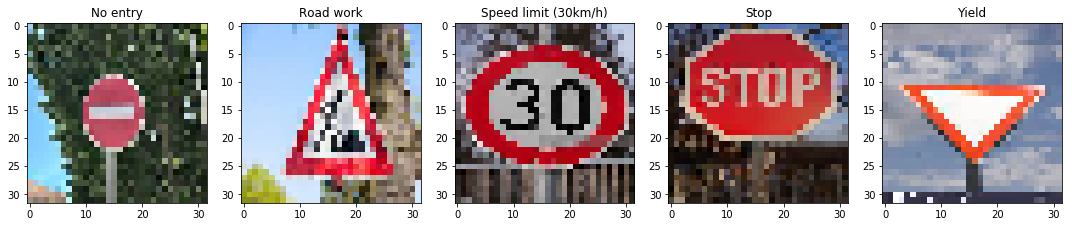

In [30]:
# Display the images
plt.rcParams["figure.figsize"] = [15, 5]

for i in range(len(imgs)):
    plt.subplot(1, len(imgs), i+1)
    plt.imshow(imgs[i])
    plt.title(imgs_labels[i])

plt.tight_layout()
plt.show()

Reshape and preprocess images

In [31]:
#reshape
imgs_pre = rgb2gray(np.array(imgs))
imgs_pre = normalize_grayscale(imgs_pre)
imgs_pre = [img.reshape((32,32,1)) for img in imgs_pre]

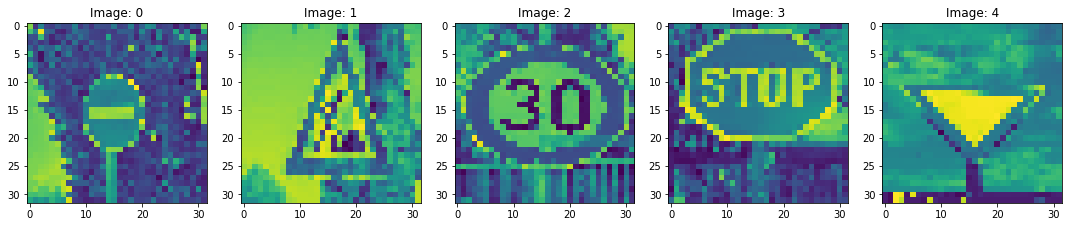

In [32]:
# Display the images
plt.rcParams["figure.figsize"] = [15, 5]

for i in range(len(imgs_pre)):
    plt.subplot(1, len(imgs_pre), i+1)
    plt.imshow(imgs_pre[i].reshape(32,32))
    plt.title('Image: %d' % i)

plt.tight_layout()
plt.show()

### Predict the Sign Type for Each Image

In [33]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    result_logits = sess.run(logits, feed_dict={x: np.array(imgs_pre), keep_prob : 1.0})

INFO:tensorflow:Restoring parameters from ./lenet


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [34]:
result_logits.shape

(5, 43)

In [35]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
# result_softmax = (5, 43)
# result_top_k = (2, 5, 5)

with tf.Session() as sess:
    result_softmax = sess.run(tf.nn.softmax(result_logits))
    result_top_k = sess.run(tf.nn.top_k(result_softmax , k= 5, sorted=True))

result_final = []
for i in range(len(imgs)):
    print('Image', i, 'probabilities:', result_top_k[0][i], '\n and predicted classes:', result_top_k[1][i])
    result_labels = [sign_labels[str(pred)] for pred in result_top_k[1][i]]
    print('Predicted labels: [', result_labels[0], ",", result_labels[1],",", result_labels[2],",", result_labels[3],",", result_labels[4],"]")
    result_final.append(result_top_k[1][i][0])
    
#result_final = [Sign_labelresult_final]

Image 0 probabilities: [ 0.41412374  0.40152186  0.0939486   0.0246068   0.0174903 ] 
 and predicted classes: [ 1 15 14  4 12]
Predicted labels: [ Speed limit (30km/h) , No vehicles , Stop , Speed limit (70km/h) , Priority road ]
Image 1 probabilities: [ 0.91499209  0.07007667  0.00691761  0.00196355  0.00161629] 
 and predicted classes: [25 14 36 29 31]
Predicted labels: [ Road work , Stop , Go straight or right , Bicycles crossing , Wild animals crossing ]
Image 2 probabilities: [ 0.52354056  0.45320803  0.0124509   0.00424416  0.00276111] 
 and predicted classes: [ 2  1  5  3 25]
Predicted labels: [ Speed limit (50km/h) , Speed limit (30km/h) , Speed limit (80km/h) , Speed limit (60km/h) , Road work ]
Image 3 probabilities: [ 0.69047272  0.11192401  0.07860365  0.04844561  0.01487884] 
 and predicted classes: [ 9 13 12 23 11]
Predicted labels: [ No passing , Yield , Priority road , Slippery road , Right-of-way at the next intersection ]
Image 4 probabilities: [  8.99698973e-01   9.8

### Analyze Performance

In [36]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
print('Expected Result: ', imgs_labels)
result_final_labels = [sign_labels[str(result)] for result in result_final]
print('Predicted Result: ', result_final_labels)
count = 0
for i in range(len(result_final)):
    if result_final_labels[i] == imgs_labels[i]:
        count = count + 1
print("Accuracy of prediction = %", (count/len(imgs_labels))*100)        


Expected Result:  ['No entry', 'Road work', 'Speed limit (30km/h)', 'Stop', 'Yield']
Predicted Result:  ['Speed limit (30km/h)', 'Road work', 'Speed limit (50km/h)', 'No passing', 'Yield']
Accuracy of prediction = % 40.0


### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [37]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")